# Neural newtorks (Veštačke neuronske mreže)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import files
uploaded = files.upload()



Saving london_weather.csv to london_weather.csv


In [4]:
df = pd.read_csv('london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Opis karakteristika
| Karakteristika | Opis
| -------- | ------- |
| date | Datum merenja |
| cloud_cover | Oblačnost merena u oktama |
| sunshine | Broj sunčanih sati u danu |
| global_radiation | Zračenje mereno u vatima po metru kvadratnom |
| max_temp  | Maksimalna temperatura u toku dana |
| mean_temp  | Srednja temperatura u toku dana   |
| min_temp |  Minimalna temperatura u toku dana |
| precipitation |  Padavine izražene u milimetrima   |
| pressure | Atmosferski pritisak izražen u Paskalima  |
| snow_depth | Visina snežnog pokrivača u milimetrima   |

In [5]:
df['date'].head()

,date
0,19790101
1,19790102
2,19790103
3,19790104
4,19790105


In [6]:
if not isinstance(df.index, pd.DatetimeIndex):
    df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')
    df = df.set_index("date")


In [7]:
print(f"🗓️ Starting date: {df.index.min().strftime('%Y-%m-%d')}")
print(f"🗓️ Ending date:   {df.index.max().strftime('%Y-%m-%d')}")

🗓️ Starting date: 1979-01-01
🗓️ Ending date:   2020-12-31


In [8]:
df.isna().sum().sort_values(ascending=False)

,0
snow_depth,1441
mean_temp,36
cloud_cover,19
global_radiation,19
max_temp,6
precipitation,6
pressure,4
min_temp,2
sunshine,0


In [9]:
df['snow_depth']=df['snow_depth'].fillna(0) # ukoliko nema podatka, nema ni snega

interp_cols = ['max_temp','min_temp','mean_temp','pressure','global_radiation','cloud_cover',"precipitation"]

df[interp_cols] = (df[interp_cols]
    .interpolate(method='time', limit=3, limit_direction='both')
    .ffill()
    .bfill()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


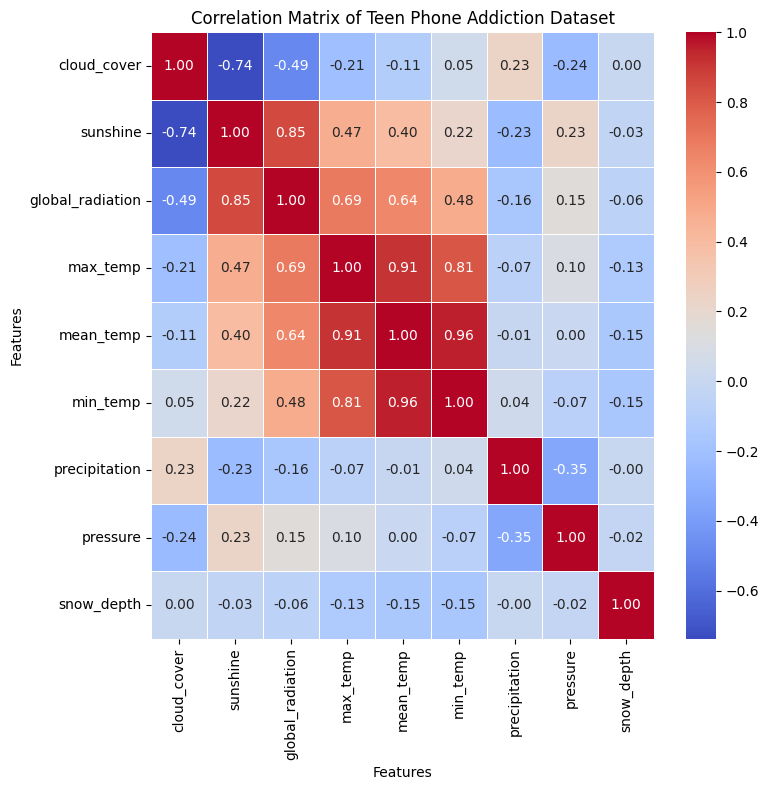

In [11]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##  Pregled pojedinih karakteristika

Maksimalna, srednja i minimalna temperatura u poslednjih 10 godina

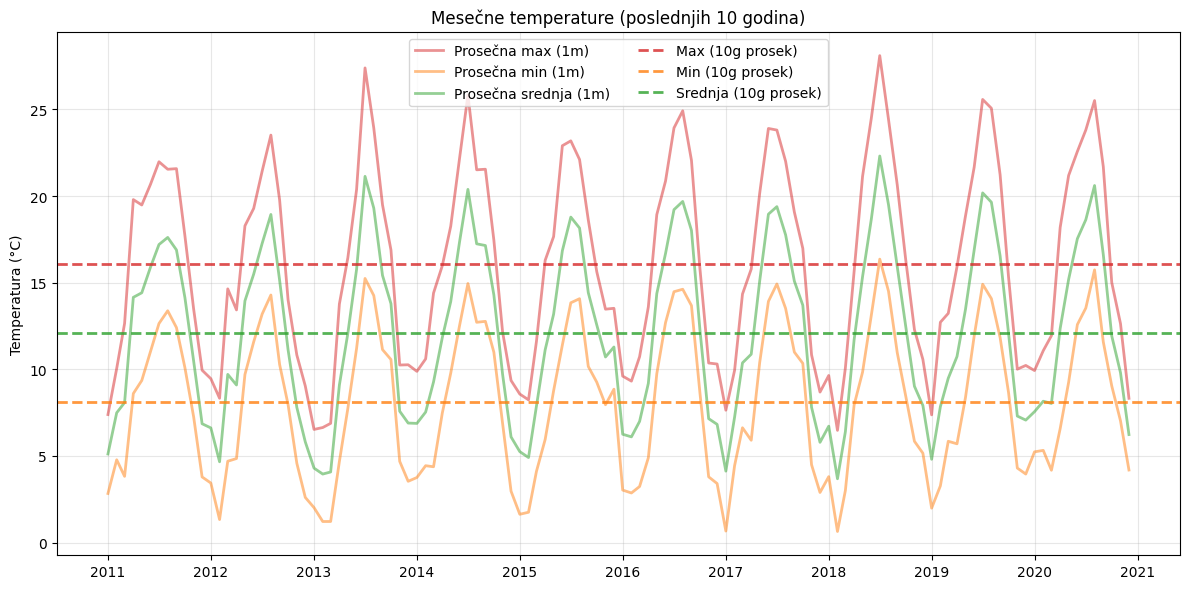

In [12]:
M = df[['max_temp', 'min_temp', 'mean_temp']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)
Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['max_temp'],  alpha=0.5, lw=2, label='Prosečna max (1m)', color='tab:red')
ax.plot(Mw.index, Mw['min_temp'],  alpha=0.5, lw=2, label='Prosečna min (1m)', color='tab:orange')
ax.plot(Mw.index, Mw['mean_temp'], alpha=0.5, lw=2, label='Prosečna srednja (1m)', color='tab:green')

ax.axhline(Mw['max_temp'].mean(),  color='tab:red',   ls='--', lw=2, alpha=0.8, label='Max (10g prosek)')
ax.axhline(Mw['min_temp'].mean(),  color='tab:orange',ls='--', lw=2, alpha=0.8, label='Min (10g prosek)')
ax.axhline(Mw['mean_temp'].mean(), color='tab:green', ls='--', lw=2, alpha=0.8, label='Srednja (10g prosek)')

ax.set_title('Mesečne temperature (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Temperatura (°C)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Pritisak

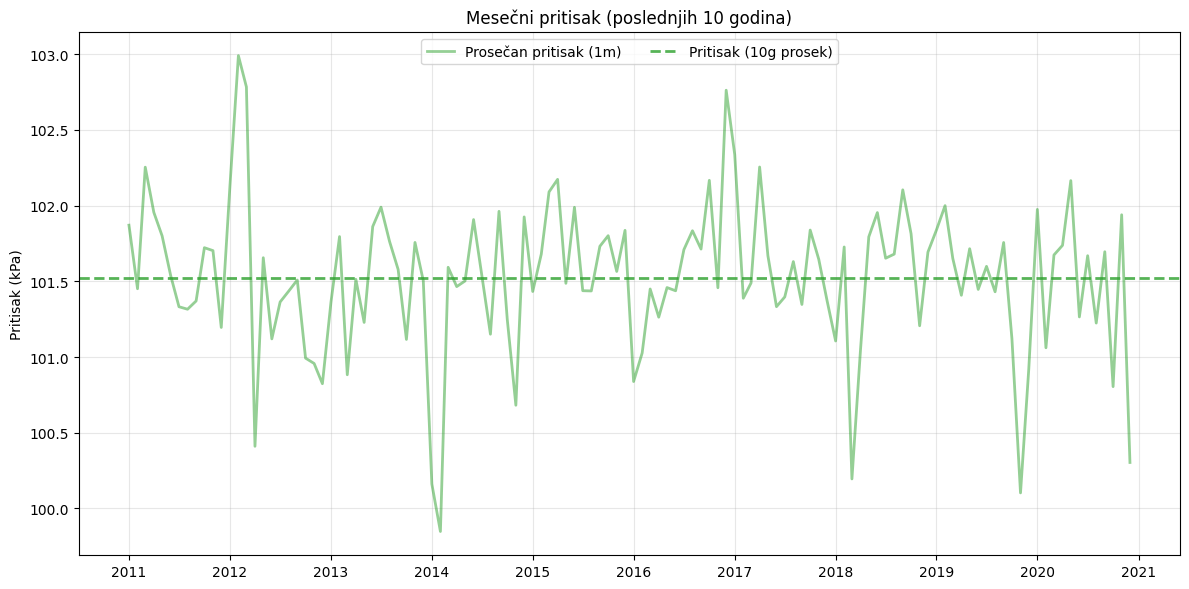

In [13]:
M = df[['pressure']].resample('MS').mean()/1000 # pretvaranje u kPa

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['pressure'],  alpha=0.5, lw=2, label='Prosečan pritisak (1m)', color='tab:green')

ax.axhline(Mw['pressure'].mean(),  color='tab:green',   ls='--', lw=2, alpha=0.8, label='Pritisak (10g prosek)')

ax.set_title('Mesečni pritisak (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Pritisak (kPa)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=3, loc='upper center')
plt.tight_layout()
plt.show()


Padavine

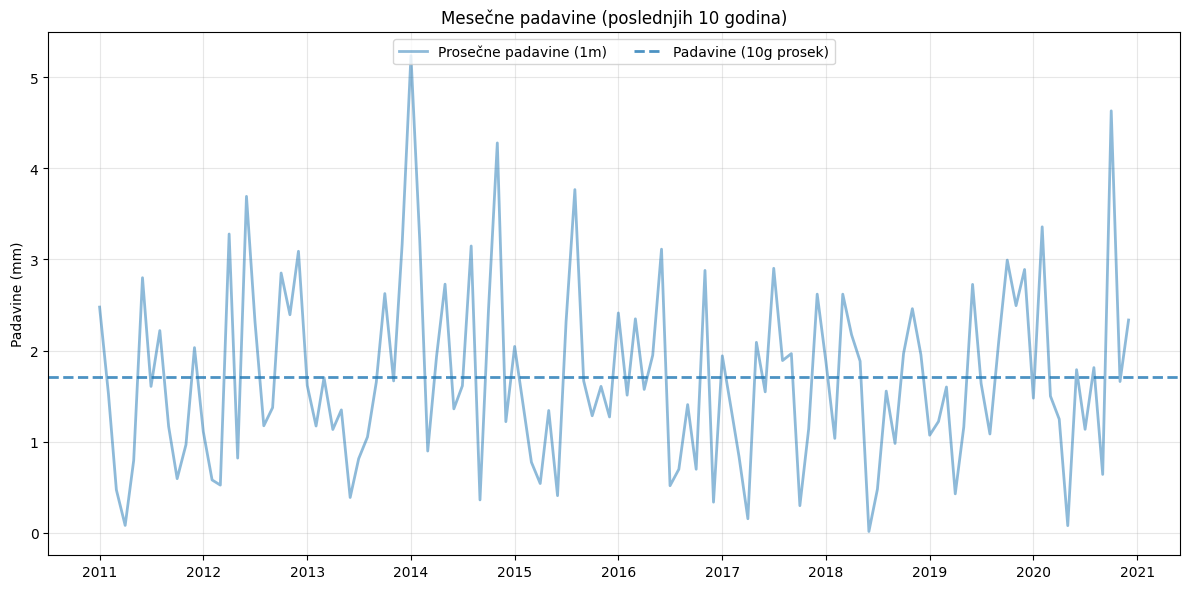

In [14]:
M = df[['precipitation']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['precipitation'],  alpha=0.5, lw=2,label='Prosečne padavine (1m)', color='tab:blue')

ax.axhline(Mw['precipitation'].mean(),  color='tab:blue',   ls='--', lw=2, alpha=0.8, label='Padavine (10g prosek)')

ax.set_title('Mesečne padavine (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Padavine (mm)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Snežni pokrivač

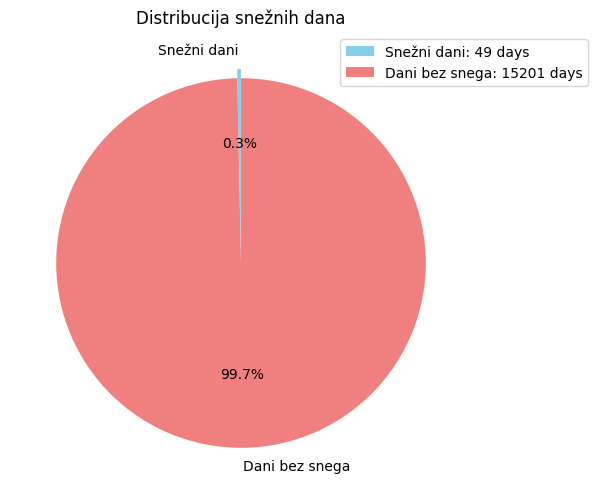

In [15]:
snow_counts = pd.Series({
    "Snežni dani": df['snow_depth'].where(lambda x: x>0).value_counts().values[0],
    "Dani bez snega": df['snow_depth'].where(lambda x: x==0).value_counts().values[0]
})

plt.figure(figsize=(6, 6))
snow_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Distribucija snežnih dana")
labels = [f"{cat}: {count} days" for cat, count in snow_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.show()

Radijacija Sunca

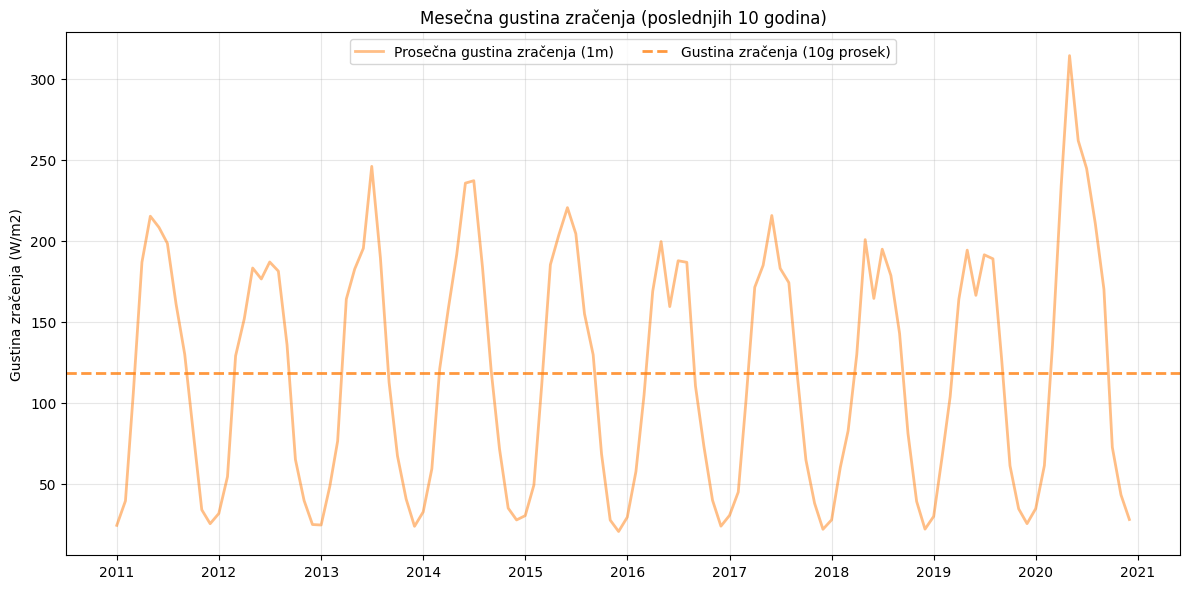

In [16]:
M = df[['global_radiation']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['global_radiation'],  alpha=0.5, lw=2,label='Prosečna gustina zračenja (1m)', color='tab:orange')

ax.axhline(Mw['global_radiation'].mean(),  color='tab:orange',   ls='--', lw=2, alpha=0.8, label='Gustina zračenja (10g prosek)')

ax.set_title('Mesečna gustina zračenja (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Gustina zračenja (W/m2)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Pokrivenost oblacima

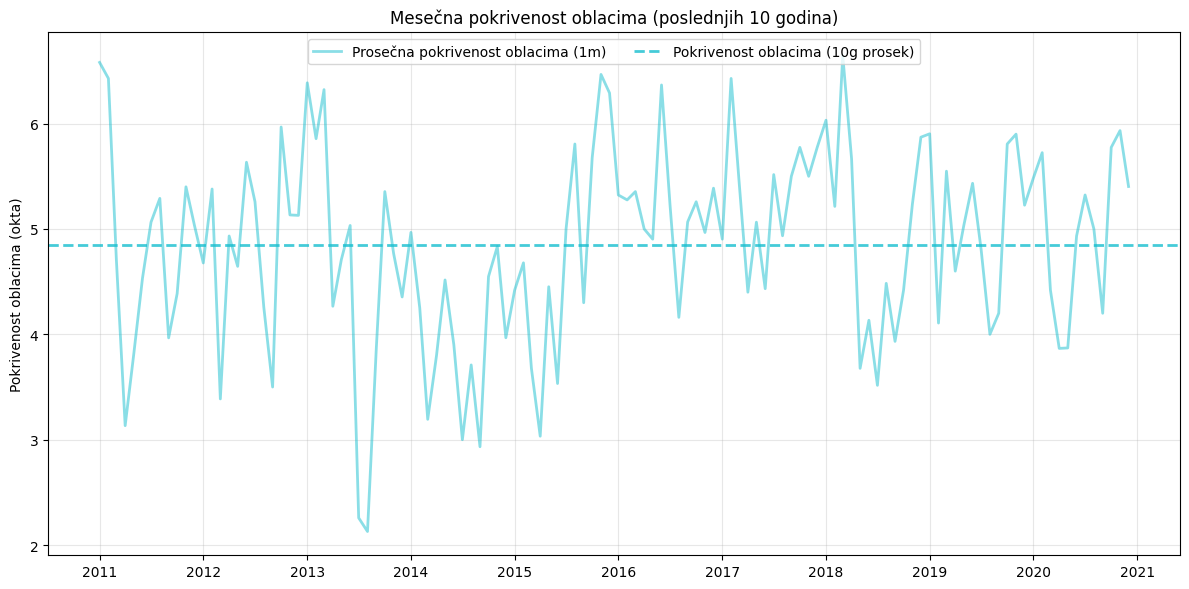

In [17]:
M = df[['cloud_cover']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['cloud_cover'],  alpha=0.5, lw=2,label='Prosečna pokrivenost oblacima (1m)', color='tab:cyan')

ax.axhline(Mw['cloud_cover'].mean(),  color='tab:cyan',   ls='--', lw=2, alpha=0.8, label='Pokrivenost oblacima (10g prosek)')

ax.set_title('Mesečna pokrivenost oblacima (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Pokrivenost oblacima (okta)') # okta: 0-8 skala za pokrivenost oblacima (0=bez oblaka, 8=potpuno oblačno)

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Osunčanost

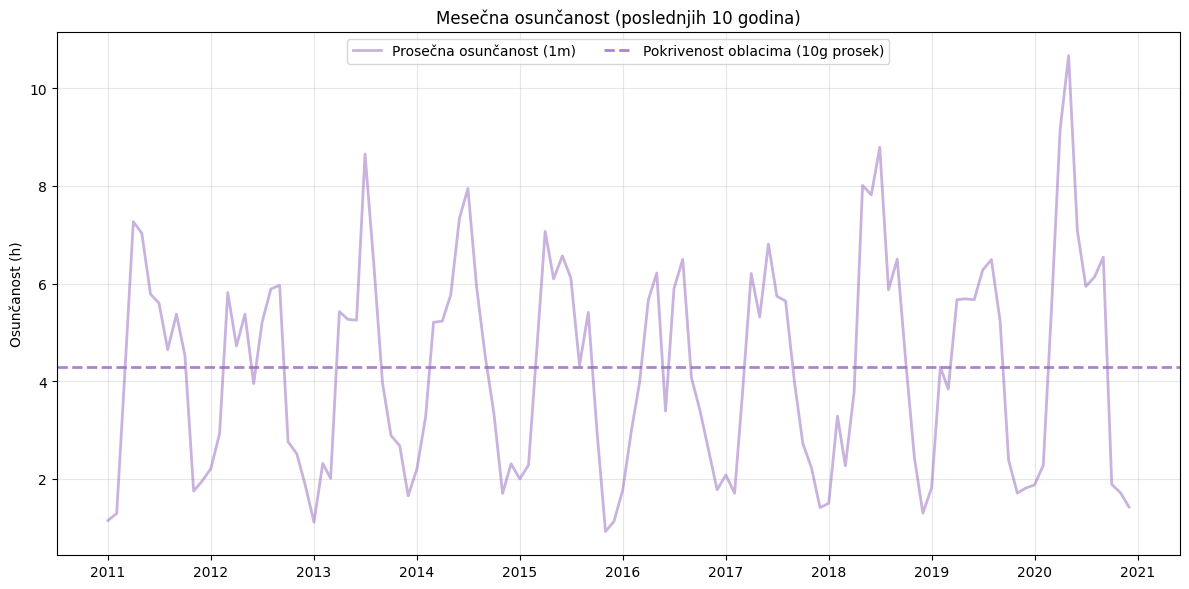

In [18]:
M = df[['sunshine']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['sunshine'],  alpha=0.5, lw=2,label='Prosečna osunčanost (1m)', color='tab:purple')

ax.axhline(Mw['sunshine'].mean(),  color='tab:purple',   ls='--', lw=2, alpha=0.8, label='Pokrivenost oblacima (10g prosek)')

ax.set_title('Mesečna osunčanost (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Osunčanost (h)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def eval_metrics(model,y_true, y_hat):
    mae = mean_absolute_error(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_hat)
    return pd.DataFrame([{
        "Model": model,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }])

# Linear regression

    Model      MAE      MSE    RMSE       R2
LinearReg 1.109394 2.062901 1.43628 0.675041
   Model      MAE      MSE     RMSE       R2
Naive-12 1.415846 3.227474 1.796517 0.491591


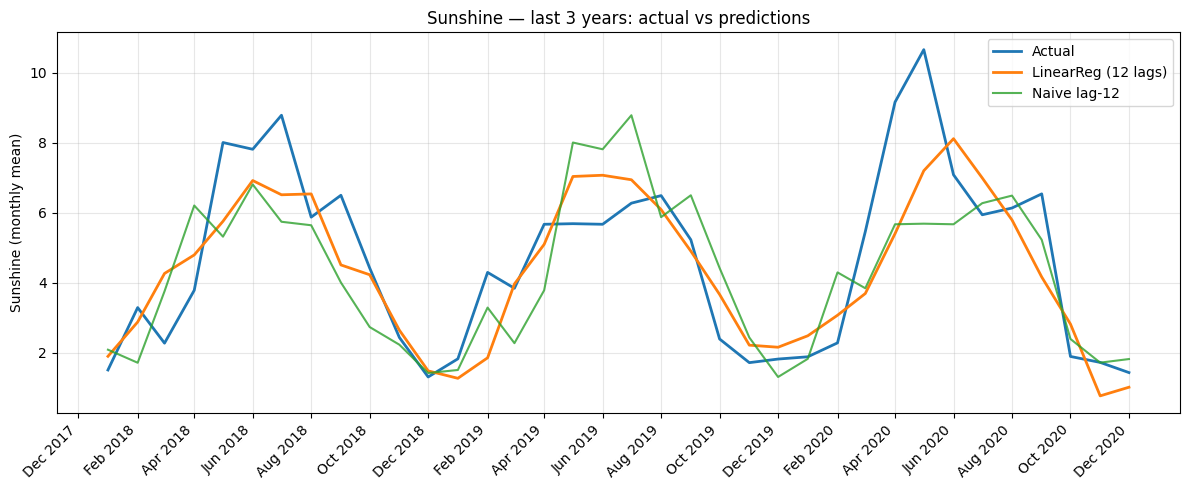

In [44]:
from sklearn.linear_model import LinearRegression

sun = df['sunshine'].resample('MS').mean()

def make_lags(series, lags=12):
    out = pd.DataFrame({'sunshine': series})
    for k in range(1, lags + 1):
        out[f'lag_{k}'] = series.shift(k)
    return out

data = make_lags(sun, lags=12).dropna()

test_start = pd.Timestamp('2018-01-01')
test_end   = df.index.max()

train = data.loc[data.index < test_start]
test  = data.loc[(data.index >= test_start) & (data.index <= test_end)]

X_train = train.drop(columns='sunshine').values
y_train = train['sunshine'].values
X_test  = test.drop(columns='sunshine').values
y_test  = test['sunshine'].values

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

y_naive = test['lag_12'].values

metrics_lr = eval_metrics("LinearReg",y_test, y_pred)
metrics_nv = eval_metrics("Naive-12",y_test, y_naive)

print(metrics_lr.to_string(index=False))
print(metrics_nv.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(test.index, y_test,  lw=2, label='Actual')
ax.plot(test.index, y_pred, lw=2, label='LinearReg (12 lags)')
ax.plot(test.index, y_naive, lw=1.5, alpha=0.8, label='Naive lag-12')

ax.set_title('Sunshine — last 3 years: actual vs predictions')
ax.set_ylabel('Sunshine (monthly mean)'); ax.set_xlabel('')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

# Testiranje modela

In [55]:
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2'])

In [56]:
def make_windows(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback].values)
        ys.append(y.iloc[i+lookback])
    return np.array(Xs), np.array(ys)

In [57]:
scaller = MinMaxScaler()

features = scaller.fit_transform(df.drop(columns=['sunshine']))
features = pd.DataFrame(features, columns=df.drop(columns=['sunshine']).columns)

target = df['sunshine']
features.index=df.index
target.index=df.index

In [58]:
def make_split(X,y,lookback):
    win_index = features.index[lookback:]

    train_end_date = pd.Timestamp("2015-01-01")
    val_end_date   = pd.Timestamp("2018-01-01")

    train_mask = win_index <= train_end_date
    val_mask   = (win_index > train_end_date) & (win_index <= val_end_date)
    test_mask  = win_index > val_end_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_val,   y_val   = X[val_mask],   y[val_mask]
    X_test,  y_test  = X[test_mask],  y[test_mask]
    return X_train,y_train,X_val,y_val,X_test,y_test


def plot_loss(history,title:str="Loss over epochs"):
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_test(y_test,y_pred,pred_label:str="LSTM"):
    idx = pd.date_range("2018-01-01", periods=1095, freq="D")
    df_pred = pd.DataFrame({
        "Actual": y_test,
        pred_label: y_pred
    }, index=idx)

    df_monthly = df_pred.resample("MS").mean()

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual (monthly mean)")
    ax.plot(df_monthly.index, df_monthly[pred_label], lw=2, label=f"{pred_label} (monthly mean)")

    ax.set_title("Sunshine — last 3 years")
    ax.set_ylabel("Sunshine"); ax.set_xlabel("")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model_to_eval,test_ds_to_eval,x_test,model_version:str):
    test_loss_res, test_rmse_res = model_to_eval.evaluate(test_ds_to_eval,verbose=0)
    print(f"Test loss: {test_loss_res:.5f}\nTest rmse: {test_rmse_res:.5f}")
    y_pred_res = model_to_eval.predict(x_test,verbose=0).ravel()
    metrics_res = eval_metrics(f"{model_version}", y_test, y_pred_res)
    print(metrics_res)
    plot_loss(history,title=f"Loss for {model_version}")
    plot_test(y_test, y_pred_res,pred_label=f"{model_version}")
    return y_pred_res, metrics_res

In [70]:
X, y = make_windows(features, target, 30)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,30)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test {X_test.shape}, y_test: {y_test.shape}")


X_train: (13120, 30, 8), y_train: (13120,)
X_val: (1096, 30, 8), y_val: (1096,)
X_test (1095, 30, 8), y_test: (1095,)


In [72]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)
BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)


## LSTM

In [73]:

F = X.shape[-1]
model_lstm_v3_adam = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.LSTM(32, return_sequences=True),
        keras.layers.LayerNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

model_lstm_v3_adam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3_adam.summary()

# --- Train model ---
history = model_lstm_v3_adam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_6           │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 7s - 140ms/step - loss: 21.5434 - root_mean_squared_error: 4.6415 - val_loss: 14.3160 - val_root_mean_squared_error: 3.7837 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 1s - 25ms/step - loss: 14.7937 - root_mean_squared_error: 3.8463 - val_loss: 11.8898 - val_root_mean_squared_error: 3.4482 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 26ms/step - loss: 13.3155 - root_mean_squared_error: 3.6490 - val_loss: 11.7511 - val_root_mean_squared_error: 3.4280 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 3s - 48ms/step - loss: 12.9322 - root_mean_squared_error: 3.5961 - val_loss: 11.5409 - val_root_mean_squared_error: 3.3972 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 25ms/step - loss: 12.6916 - root_mean_squared_error: 3.5625 - val_loss: 11.4261 - val_root_mean_squared_error: 3.3802 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 1s - 25ms/step - loss: 12.5393 - root_mean_squared_error: 3.5411 - val_loss: 11.3216 - val_root_mean_squared_error: 3.3648 -

Test loss: 8.55727
Test rmse: 2.92528
     Model       MAE       MSE      RMSE       R2
0  LSTM_V3  2.399687  8.606942  2.933759  0.54296


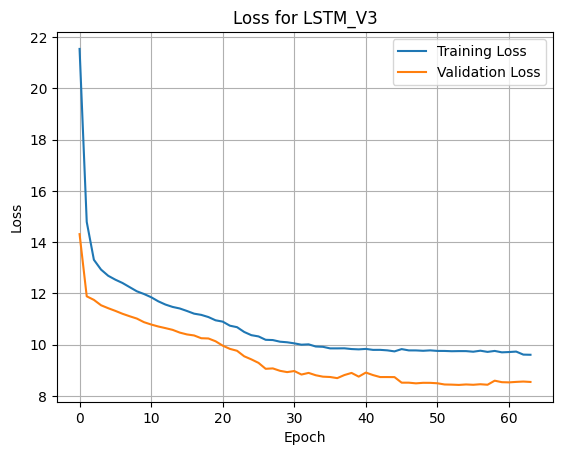

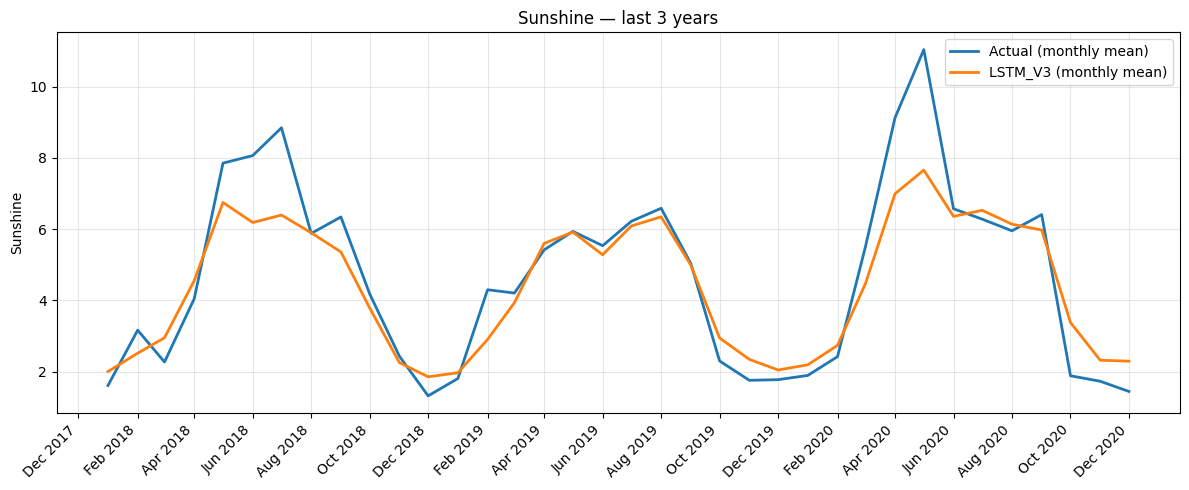

In [74]:
y_pred_lstm_v3, metrics_lstm_v3 = evaluate_model(model_to_eval=model_lstm_v3,test_ds_to_eval=test_ds,x_test=X_test,model_version="LSTM_V3")

ADAMAX

In [77]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

# --- Build datasets ---
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(128)
    .batch(BATCH)
    .prefetch(2)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(BATCH)
    .prefetch(2)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(BATCH)
    .prefetch(2)
)

In [88]:
F = X.shape[-1]

model_lstm_v3_adamax = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_lstm_v3_adamax.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3:adamax.summary()

history_lstm_v3_adamax = model_lstm_v3_adamax.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,401 (32.82 KB)

 Trainable params: 8,401 (32.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 6s - 111ms/step - loss: 25.2640 - root_mean_squared_error: 5.0263 - val_loss: 15.3853 - val_root_mean_squared_error: 3.9224 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 1s - 22ms/step - loss: 16.6472 - root_mean_squared_error: 4.0801 - val_loss: 14.2795 - val_root_mean_squared_error: 3.7788 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 24ms/step - loss: 15.8859 - root_mean_squared_error: 3.9857 - val_loss: 13.7198 - val_root_mean_squared_error: 3.7040 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 25ms/step - loss: 14.9575 - root_mean_squared_error: 3.8675 - val_loss: 12.6451 - val_root_mean_squared_error: 3.5560 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 23ms/step - loss: 13.8958 - root_mean_squared_error: 3.7277 - val_loss: 12.0304 - val_root_mean_squared_error: 3.4685 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 1s - 23ms/step - loss: 13.4242 - root_mean_squared_error: 3.6639 - val_loss: 11.7965 - val_root_mean_squared_error: 3.4346 -

Test loss: 8.60694
Test rmse: 2.93376
     Model       MAE       MSE      RMSE       R2
0  LSTM_V3  2.399687  8.606942  2.933759  0.54296


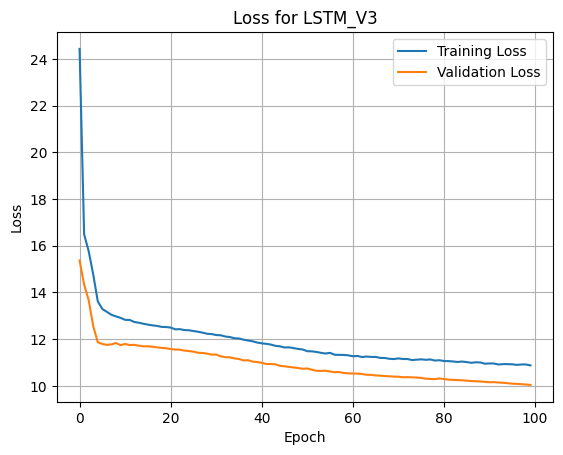

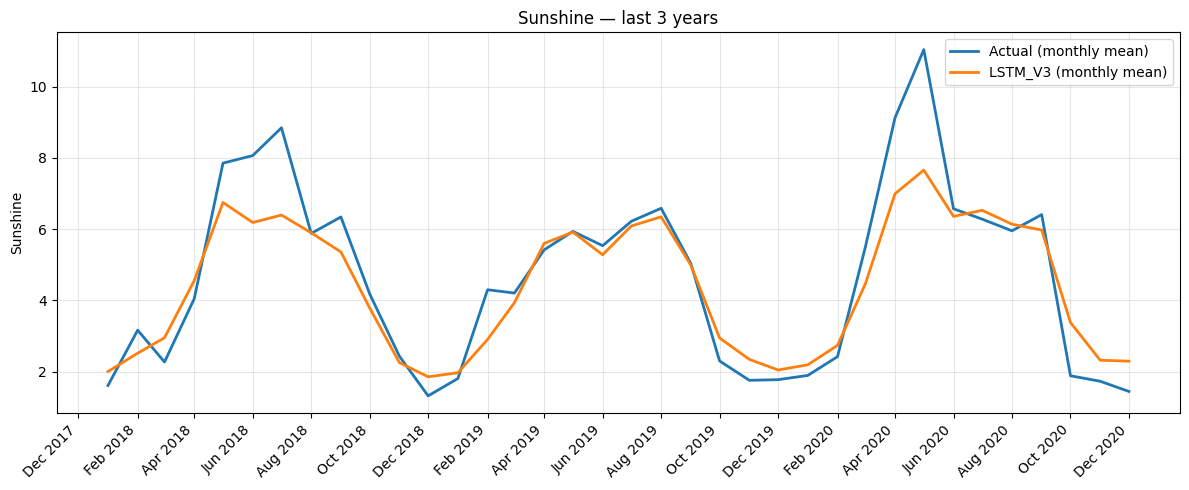

In [82]:
y_pred_lstm_v3, metrics_lstm_v3 = evaluate_model(
    model_to_eval=model_lstm_v3,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_Adamax"
)


NADAM

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 7s - 142ms/step - loss: 20.4671 - root_mean_squared_error: 4.5241 - val_loss: 13.3965 - val_root_mean_squared_error: 3.6601 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 46ms/step - loss: 14.2161 - root_mean_squared_error: 3.7704 - val_loss: 11.7640 - val_root_mean_squared_error: 3.4299 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 25ms/step - loss: 13.0170 - root_mean_squared_error: 3.6079 - val_loss: 11.5899 - val_root_mean_squared_error: 3.4044 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 25ms/step - loss: 12.7483 - root_mean_squared_error: 3.5705 - val_loss: 11.4622 - val_root_mean_squared_error: 3.3856 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 25ms/step - loss: 12.5498 - root_mean_squared_error: 3.5426 - val_loss: 11.3913 - val_root_mean_squared_error: 3.3751 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 1s - 26ms/step - loss: 12.4165 - root_mean_squared_error: 3.5237 - val_loss: 11.2850 - val_root_mean_squared_error: 3.3593 -

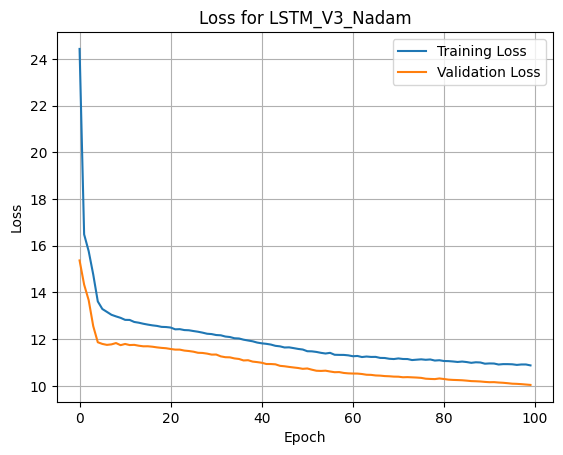

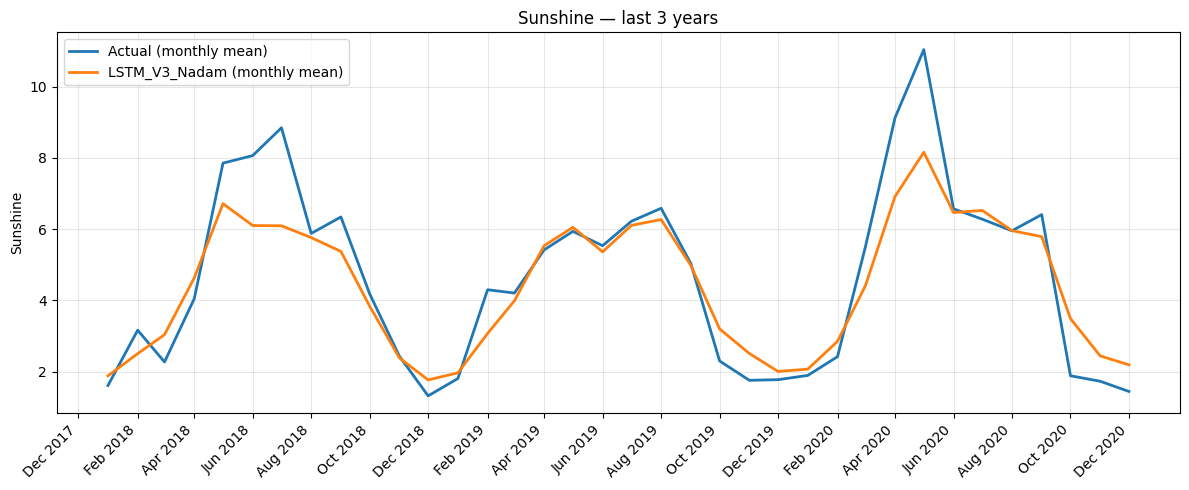

In [83]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

F = X.shape[-1]

model_lstm_v3_nadam = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_lstm_v3_nadam.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3_nadam.summary()

history_lstm_v3_nadam = model_lstm_v3_nadam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ],
    verbose=2,
)


Test loss: 8.55342
Test rmse: 2.92462
           Model       MAE       MSE      RMSE        R2
0  LSTM_V3_Nadam  2.375835  8.553425  2.924624  0.545802


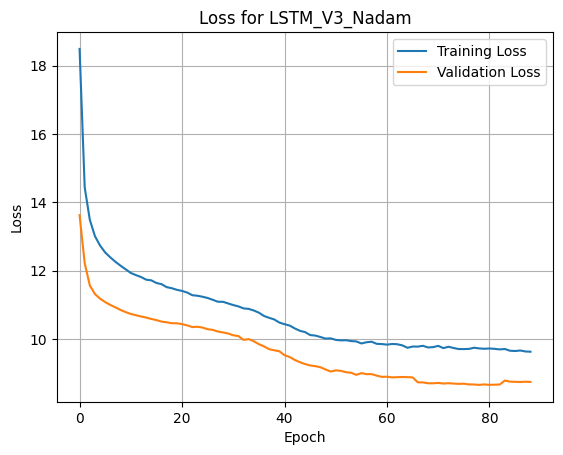

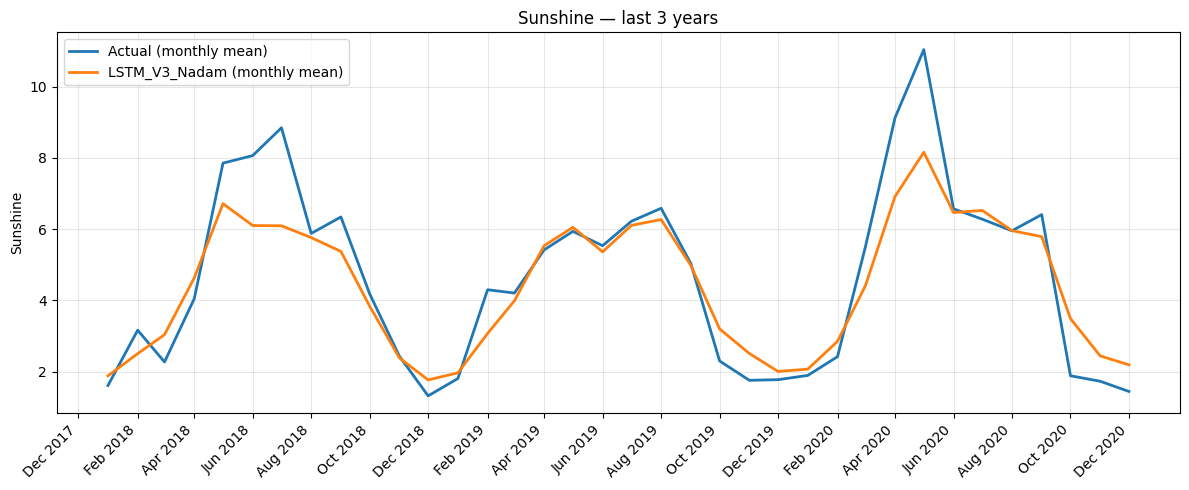

In [98]:
y_pred_v3_nadam, metrics_v3_nadam = evaluate_model(
    model_to_eval=model_v3_nadam,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_Nadam"
)

SGD


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_8           │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 7s - 134ms/step - loss: 21.6013 - root_mean_squared_error: 4.6477 - val_loss: 14.9904 - val_root_mean_squared_error: 3.8717 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 46ms/step - loss: 16.3190 - root_mean_squared_error: 4.0397 - val_loss: 13.0641 - val_root_mean_squared_error: 3.6144 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 2s - 40ms/step - loss: 14.5127 - root_mean_squared_error: 3.8096 - val_loss: 12.2334 - val_root_mean_squared_error: 3.4976 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 3s - 58ms/step - loss: 13.5738 - root_mean_squared_error: 3.6843 - val_loss: 11.7204 - val_root_mean_squared_error: 3.4235 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 3s - 63ms/step - loss: 13.1727 - root_mean_squared_error: 3.6294 - val_loss: 11.6892 - val_root_mean_squared_error: 3.4189 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 61ms/step - loss: 12.9651 - root_mean_squared_error: 3.6007 - val_loss: 11.5536 - val_root_mean_squared_error: 3.3991 -

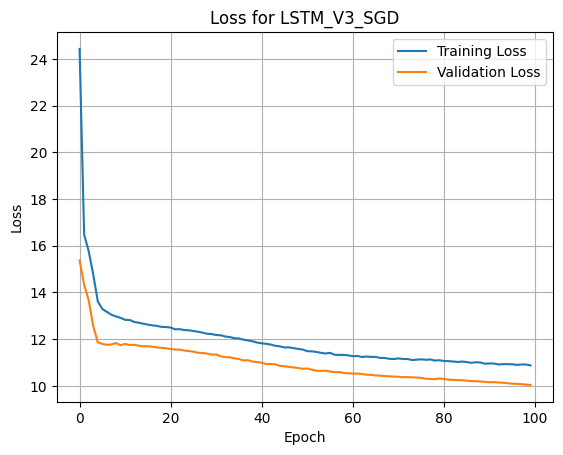

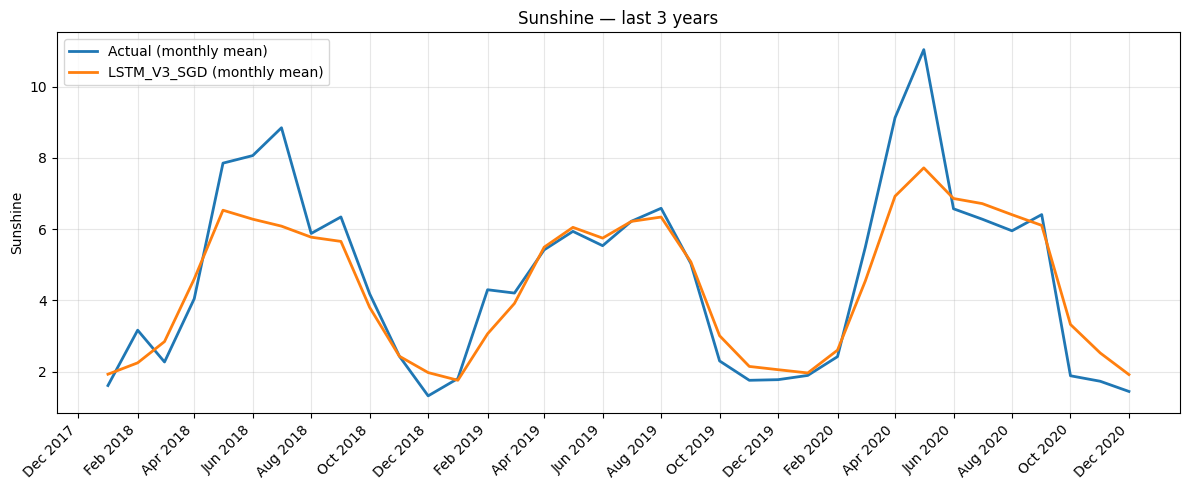

In [84]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

F = X.shape[-1]

model_v3_sgd = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_v3_sgd.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_v3_sgd.summary()

history_v3_sgd = model_v3_sgd.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ],
    verbose=2,
)




Test loss: 11.14123
Test rmse: 3.33785
         Model       MAE        MSE      RMSE        R2
0  LSTM_V3_SGD  2.737528  11.141228  3.337848  0.408386


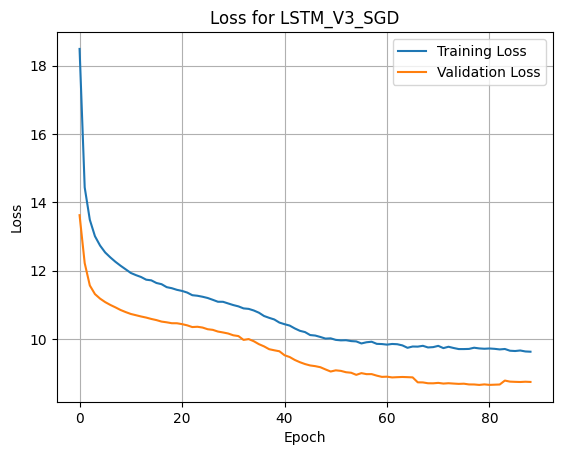

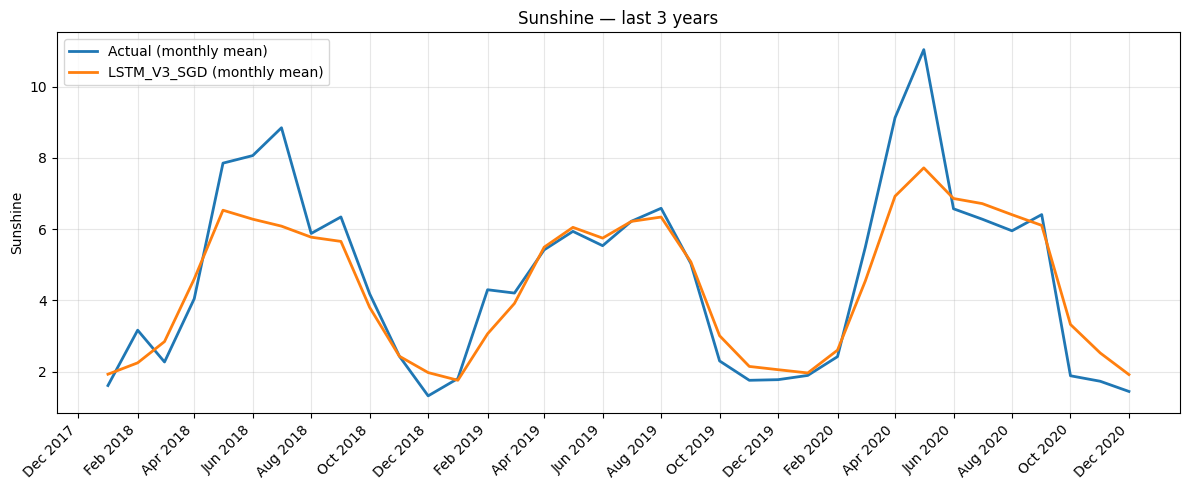

In [99]:
y_pred_lstm_v3_sgd, metrics_lstm_v3_sgd = evaluate_model(
    model_to_eval=model_lstm_v3_sgd,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_SGD"
)

ADAGRAD

In [100]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

F = X.shape[-1]

model_lstm_v3_adagrad = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_lstm_v3_adagrad.compile(
    optimizer=keras.optimizers.Adagrad(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3_adagrad.summary()

history_lstm_v3_adagrad = model_lstm_v3_adagrad.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ],
    verbose=2,
)



Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_16          │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 5s - 98ms/step - loss: 25.2942 - root_mean_squared_error: 5.0293 - val_loss: 18.5532 - val_root_mean_squared_error: 4.3073 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 36ms/step - loss: 20.9865 - root_mean_squared_error: 4.5811 - val_loss: 16.8182 - val_root_mean_squared_error: 4.1010 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 2s - 46ms/step - loss: 19.2830 - root_mean_squared_error: 4.3912 - val_loss: 15.8067 - val_root_mean_squared_error: 3.9758 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 4s - 79ms/step - loss: 18.2060 - root_mean_squared_error: 4.2669 - val_loss: 15.1996 - val_root_mean_squared_error: 3.8987 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 2s - 35ms/step - loss: 17.5438 - root_mean_squared_error: 4.1885 - val_loss: 14.8521 - val_root_mean_squared_error: 3.8538 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 63ms/step - loss: 17.1190 - root_mean_squared_error: 4.1375 - val_loss: 14.6386 - val_root_mean_squared_error: 3.8260 - 

In [ ]:
y_pred_lstm_v3_adagrad, metrics_lstm_v3_adagrad = evaluate_model(
    model_to_eval=model_lstm_v3_adagrad,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_Adagrad"
)


ADAFACTOR

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_10          │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 7s - 129ms/step - loss: 28.1174 - root_mean_squared_error: 5.3026 - val_loss: 20.3576 - val_root_mean_squared_error: 4.5119 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 1s - 26ms/step - loss: 21.7310 - root_mean_squared_error: 4.6616 - val_loss: 16.5459 - val_root_mean_squared_error: 4.0677 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 25ms/step - loss: 18.2598 - root_mean_squared_error: 4.2731 - val_loss: 14.8103 - val_root_mean_squared_error: 3.8484 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 26ms/step - loss: 16.5054 - root_mean_squared_error: 4.0627 - val_loss: 13.4404 - val_root_mean_squared_error: 3.6661 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 26ms/step - loss: 15.2589 - root_mean_squared_error: 3.9063 - val_loss: 12.5776 - val_root_mean_squared_error: 3.5465 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 60ms/step - loss: 14.4891 - root_mean_squared_error: 3.8065 - val_loss: 12.1762 - val_root_mean_squared_error: 3.4894 -

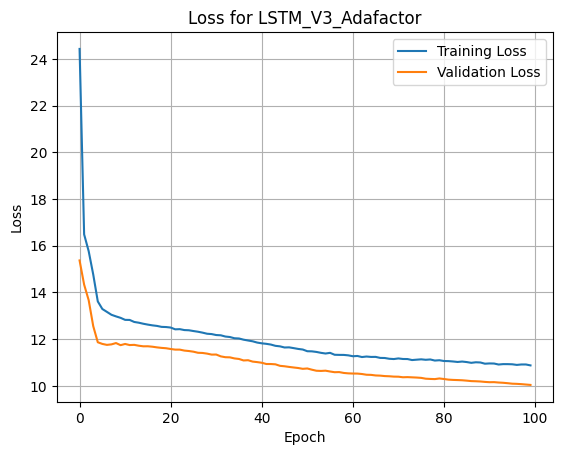

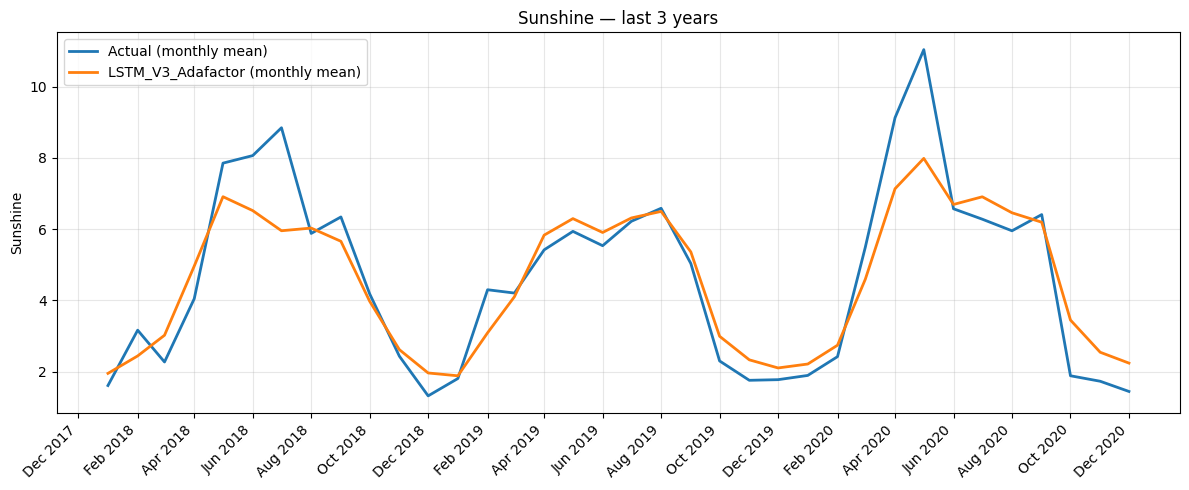

In [86]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

F = X.shape[-1]

model_lstm_v3_adafactor = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_lstm_v3_adafactor.compile(
    optimizer=keras.optimizers.Adafactor(
        learning_rate=1e-3,
        beta_2_decay=-0.8,
        epsilon_1=1e-30,
        epsilon_2=1e-3,
        clip_threshold=1.0,
        relative_step=True,
        use_ema=False,
    ),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3_adafactor.summary()

history_lstm_v3_adafactor = model_lstm_v3_adafactor.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ],
    verbose=2,
)




In [ ]:
y_pred_lstm_v3_adafactor, metrics_lstm_v3_adafactor = evaluate_model(
    model_to_eval=model_lstm_v3_adafactor,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_Adafactor"
)

LION

In [101]:
F = X.shape[-1]

# --- Define LSTM model ---
model_lstm_v3_lion = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.Dense(1),
])

# --- Compile model with Lion optimizer ---
model_lstm_v3_lion.compile(
    optimizer=keras.optimizers.Lion(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v3_lion.summary()

# --- Train model ---
history_lstm_lion = model_lstm_v3_lion.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)



Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_17          │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 8,465 (33.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 7s - 125ms/step - loss: 19.7005 - root_mean_squared_error: 4.4385 - val_loss: 14.3823 - val_root_mean_squared_error: 3.7924 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 36ms/step - loss: 14.9541 - root_mean_squared_error: 3.8671 - val_loss: 12.0215 - val_root_mean_squared_error: 3.4672 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 2s - 38ms/step - loss: 13.2021 - root_mean_squared_error: 3.6335 - val_loss: 11.8131 - val_root_mean_squared_error: 3.4370 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 25ms/step - loss: 12.8491 - root_mean_squared_error: 3.5846 - val_loss: 11.4683 - val_root_mean_squared_error: 3.3865 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 25ms/step - loss: 12.5495 - root_mean_squared_error: 3.5425 - val_loss: 11.3204 - val_root_mean_squared_error: 3.3646 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 1s - 26ms/step - loss: 12.2194 - root_mean_squared_error: 3.4956 - val_loss: 11.2494 - val_root_mean_squared_error: 3.3540 -

In [ ]:
y_pred_lstm_v3_lion, metrics_lstm_v3_lion = evaluate_model(
    model_to_eval=model_lstm_v3_lion,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="LSTM_V3_Lion"
)


## GRU

In [90]:
F = X.shape[-1]
model_gru_v4_adam = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.Bidirectional(keras.layers.GRU(32, return_sequences=True)),
        keras.layers.LayerNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.GRU(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

model_gru_v4_adam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_adam.summary()

# --- Train model ---
history = model_gru_v4_adam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 7, 64)          │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_12          │ (None, 7, 64)          │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 16)             │         3,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,145 (47.44 KB)

 Trainable params: 12,145 (47.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 10s - 188ms/step - loss: 18.6947 - root_mean_squared_error: 4.3237 - val_loss: 13.3913 - val_root_mean_squared_error: 3.6594 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 3s - 51ms/step - loss: 14.1340 - root_mean_squared_error: 3.7595 - val_loss: 11.6914 - val_root_mean_squared_error: 3.4193 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 3s - 61ms/step - loss: 12.9511 - root_mean_squared_error: 3.5988 - val_loss: 11.3742 - val_root_mean_squared_error: 3.3726 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 26ms/step - loss: 12.5033 - root_mean_squared_error: 3.5360 - val_loss: 11.1964 - val_root_mean_squared_error: 3.3461 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 4s - 70ms/step - loss: 12.2091 - root_mean_squared_error: 3.4941 - val_loss: 11.0879 - val_root_mean_squared_error: 3.3299 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 50ms/step - loss: 11.9972 - root_mean_squared_error: 3.4637 - val_loss: 10.9934 - val_root_mean_squared_error: 3.3156 

In [ ]:
y_pred_gru_v4_adam, metrics_gru_v4_adam = evaluate_model(
    model_to_eval=model_gru_v4_adam,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Adam"
)


ADAMAX

In [91]:
F = X.shape[-1]


model_gru_v4_adamax = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.Bidirectional(keras.layers.GRU(32, return_sequences=True)),
        keras.layers.LayerNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.GRU(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

# --- Compile model with Adamax ---
model_gru_v4_adamax.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_adamax.summary()

# --- Train model ---
history = model_gru_v4_adamax.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 7, 64)          │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_13          │ (None, 7, 64)          │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 16)             │         3,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,145 (47.44 KB)

 Trainable params: 12,145 (47.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 17s - 326ms/step - loss: 18.4902 - root_mean_squared_error: 4.3000 - val_loss: 13.6209 - val_root_mean_squared_error: 3.6906 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 5s - 92ms/step - loss: 14.4344 - root_mean_squared_error: 3.7993 - val_loss: 12.2172 - val_root_mean_squared_error: 3.4953 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 3s - 53ms/step - loss: 13.4860 - root_mean_squared_error: 3.6723 - val_loss: 11.5627 - val_root_mean_squared_error: 3.4004 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 2s - 47ms/step - loss: 13.0053 - root_mean_squared_error: 3.6063 - val_loss: 11.3101 - val_root_mean_squared_error: 3.3630 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 2s - 44ms/step - loss: 12.7315 - root_mean_squared_error: 3.5681 - val_loss: 11.1773 - val_root_mean_squared_error: 3.3432 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 50ms/step - loss: 12.5285 - root_mean_squared_error: 3.5396 - val_loss: 11.0751 - val_root_mean_squared_error: 3.3279 

In [ ]:
y_pred_gru_v4_adamax, metrics_gru_v4_adamax = evaluate_model(
    model_to_eval=model_gru_v4_adamax,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Adamax"
)


SGD

In [ ]:
F = X.shape[-1]

model_gru_v4_sgd = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(16, return_sequences=False),
    keras.layers.Dense(1),
])

model_gru_v4_sgd.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_sgd.summary()

history_gru_v4_sgd = model_gru_v4_sgd.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ],
    verbose=2,
)


In [ ]:
y_pred_gru_v4_sgd, metrics_gru_v4_sgd = evaluate_model(
    model_to_eval=model_gru_v4_sgd,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Sgd"
)


ADAGRAD

In [ ]:
F = X.shape[-1]


model_gru_v4_adagrad = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(16, return_sequences=False),
    keras.layers.Dense(1),
])

# --- Compile model with Adagrad ---
model_gru_v4_adagrad.compile(
    optimizer=keras.optimizers.Adagrad(learning_rate=1e-2),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_adagrad.summary()

# --- Train model ---
history_gru_v4_adagrad = model_gru_v4_adagrad.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)



In [ ]:
y_pred_gru_v4_adagrad, metrics_gru_v4_adagrad = evaluate_model(
    model_to_eval=model_gru_v4_adagrad,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Adagrad"
)


ADAFACTOR

In [96]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

F = X.shape[-1]

# --- Define model ---
model_gru_v4_adafactor = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(16, return_sequences=False),
    keras.layers.Dense(1),
])

# --- Compile model with Adafactor ---
model_gru_v4_adafactor.compile(
    optimizer=tf.keras.optimizers.Adafactor(
        learning_rate=1e-3,
        beta_2_decay=-0.8,
        epsilon_1=1e-30,
        epsilon_2=1e-3,
        clip_threshold=1.0,
        relative_step=True,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name='adafactor'
    ),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_adafactor.summary()


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 14, 32)         │         4,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_15          │ (None, 14, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,513 (25.44 KB)

 Trainable params: 6,513 (25.44 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
history_gru_v4_adafactor = model_gru_v4_adafactor.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Epoch 1/100
52/52 - 8s - 146ms/step - loss: 26.9545 - root_mean_squared_error: 5.1918 - val_loss: 19.2733 - val_root_mean_squared_error: 4.3901 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 47ms/step - loss: 20.1632 - root_mean_squared_error: 4.4903 - val_loss: 14.8931 - val_root_mean_squared_error: 3.8592 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 3s - 48ms/step - loss: 16.7829 - root_mean_squared_error: 4.0967 - val_loss: 13.6512 - val_root_mean_squared_error: 3.6948 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 4s - 67ms/step - loss: 15.4329 - root_mean_squared_error: 3.9285 - val_loss: 13.2410 - val_root_mean_squared_error: 3.6388 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 4s - 68ms/step - loss: 14.7139 - root_mean_squared_error: 3.8359 - val_loss: 12.7177 - val_root_mean_squared_error: 3.5662 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 55ms/step - loss: 14.1232 - root_mean_squared_error: 3.7581 - val_loss: 12.1740 - val_root_mean_squared_error: 3.4891 -

NADAM

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

F = X.shape[-1]

# --- Define model ---
model_gru_v4_nadam = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(16, return_sequences=False),
    keras.layers.Dense(1),
])

# --- Compile model with Nadam ---
model_gru_v4_nadam.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_nadam.summary()

# --- Train model ---
history_gru_v4_nadam = model_gru_v4_nadam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)



In [ ]:
y_pred_gru_v4_nadam, metrics_gru_v4_nadam = evaluate_model(
    model_to_eval=model_gru_v4_nadam,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Nadam"
)


LION

In [ ]:

F = X.shape[-1]


model_gru_v4_lion = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(16, return_sequences=False),
    keras.layers.Dense(1),
])

# --- Compile model with Lion ---
model_gru_v4_lion.compile(
    optimizer=keras.optimizers.Lion(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v4_lion.summary()

# --- Train model ---
history_gru_v4_lion = model_gru_v4_lion.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)




In [ ]:
y_pred_gru_v4_lion, metrics_gru_v4_lion = evaluate_model(
    model_to_eval=model_gru_v4_lion,
    test_ds_to_eval=test_ds,
    x_test=X_test,
    model_version="GRU_V4_Lion"
)


SIMPLE RNN

In [ ]:
from tensorflow import keras
import tensorflow as tf

# --- Build Simple RNN classifier ---
F = X.shape[-1]  # number of features
model_rnn = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.SimpleRNN(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.SimpleRNN(32, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # binary classification
])

# Compile model
model_rnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()]
)

model_rnn.summary()

# --- Train Simple RNN ---
history_rnn = model_rnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 7, 64)          │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,929 (34.88 KB)

 Trainable params: 8,929 (34.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 25.7090 - root_mean_squared_error: 5.0356 - val_loss: 12.2457 - val_root_mean_squared_error: 3.4994 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.9697 - root_mean_squared_error: 3.7369 - val_loss: 11.5552 - val_root_mean_squared_error: 3.3993 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.0553 - root_mean_squared_error: 3.6126 - val_loss: 11.1231 - val_root_mean_squared_error: 3.3351 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.7535 - root_mean_squared_error: 3.5707 - val_loss: 11.0236 - val_root_mean_squared_error: 3.3202 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3585 - root_mean_squared_error: 3.5148 - val_loss: 10.8394 - val_root_mean_squared_error: 3.2923 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12.1344 - root_mean_squared_er

['loss', 'compile_metrics']
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4704 - root_mean_squared_error: 3.0751 


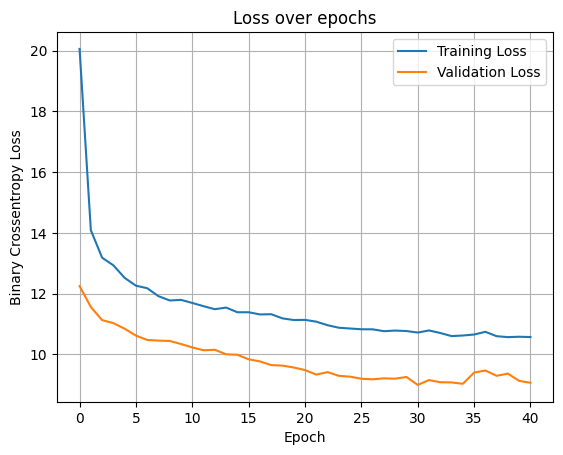

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
(1095,) (1095,) (1095, 7, 8)


In [ ]:

print(model_rnn.metrics_names)
test_loss, test_rmse = model_rnn.evaluate(test_ds)

plot_loss(history_rnn)

y_pred = np.concatenate([model_rnn.predict(x).ravel() for x, _ in test_ds])

print(y_test.shape, y_pred.shape, X_test.shape)


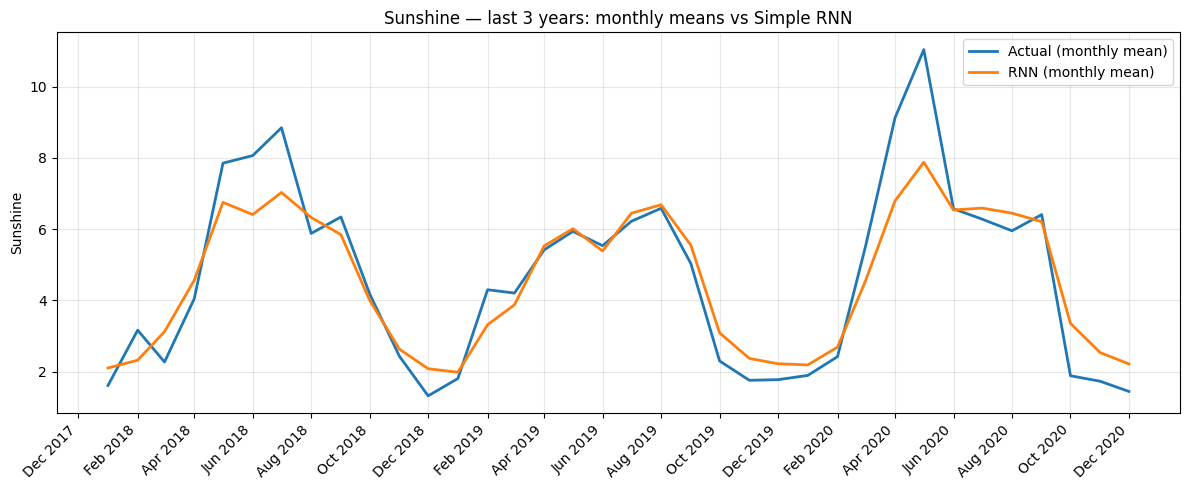

In [ ]:

# y_test and y_pred_rnn are numpy arrays (length 1095, daily from 2018-01-01)
idx = pd.date_range("2018-01-01", periods=1095, freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "RNN": y_pred  # y_pred from Simple RNN model
}, index=idx)

# --- Convert to monthly averages (Month Start) ---
df_monthly = df.resample("MS").mean()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual (monthly mean)")
ax.plot(df_monthly.index, df_monthly["RNN"], lw=2, label="RNN (monthly mean)")

ax.set_title("Sunshine — last 3 years: monthly means vs Simple RNN")
ax.set_ylabel("Sunshine")
ax.set_xlabel("")

# ticks: show every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


POREDJENJE LSTM, GRU, SIMPLE RNN

In [ ]:

gru_loss, gru_rmse = model_gru.evaluate(test_ds, verbose=0)

lstm_loss, lstm_rmse = model.evaluate(test_ds, verbose=0)

rnn_loss, rnn_rmse = model_rnn.evaluate(test_ds, verbose=0)

print(f"Test RMSE:\nGRU: {gru_rmse:.4f}\nLSTM: {lstm_rmse:.4f}\nSimple RNN: {rnn_rmse:.4f}")


Test RMSE:
GRU: 3.0228
LSTM: 3.0248
Simple RNN: 2.9728


In [ ]:


y_pred_gru = np.concatenate([model_gru.predict(x).ravel() for x, _ in test_ds])
y_pred_lstm = np.concatenate([model.predict(x).ravel() for x, _ in test_ds])
y_pred_rnn = np.concatenate([model_rnn.predict(x).ravel() for x, _ in test_ds])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


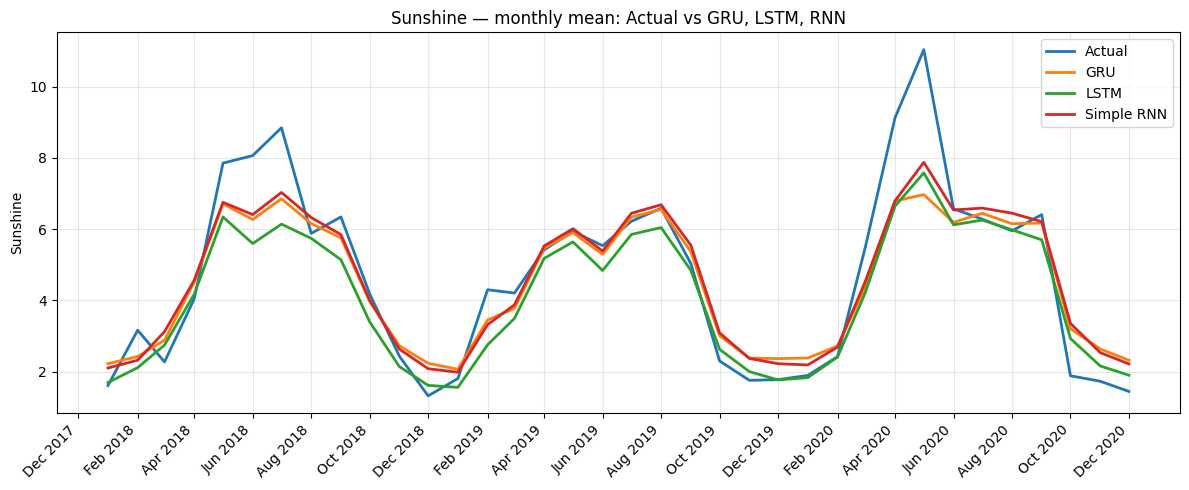

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

idx = pd.date_range("2018-01-01", periods=len(y_test), freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "GRU": y_pred_gru,
    "LSTM": y_pred_lstm,
    "RNN": y_pred_rnn
}, index=idx)

# Mesečni prosek
df_monthly = df.resample("MS").mean()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual")
ax.plot(df_monthly.index, df_monthly["GRU"], lw=2, label="GRU")
ax.plot(df_monthly.index, df_monthly["LSTM"], lw=2, label="LSTM")
ax.plot(df_monthly.index, df_monthly["RNN"], lw=2, label="Simple RNN")

ax.set_title("Sunshine — monthly mean: Actual vs GRU, LSTM, RNN")
ax.set_ylabel("Sunshine")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()
